
## Ионов Тимур ИУ9-71Б
### Лабораторная работа N7«Сравнение скорости сходимости метода Якоби и Зейделя»

In [116]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
from matplotlib.pyplot import figure

In [117]:
def gen_matrix(n, a=-1, b=1, triag_dom=1):
    x = np.random.uniform(a, b, size=(n, n))
    if triag_dom > 1:
        ids = np.diag_indices(n)
        diag = np.sum(np.abs(x), axis=1)
        diag *= triag_dom
        x[ids] = diag
    return x

In [118]:
def gauss(a, b, row_opt=False, col_opt=False, both_opt=False):
    a = deepcopy(a)
    b = deepcopy(b)
    n = len(b)
    
    assert len(a.shape) == 2 and a.shape[0] == a.shape[1]
    assert not any(np.diag(a) == 0)
    
    # forward
    order = np.arange(n)
    for k in range(n-1):
        for i in range(k + 1, n):
            if both_opt:
                row_max = np.max(np.abs(a[k:, k]))
                col_max = np.max(np.abs(a[k, k:]))
                if row_max > col_max:
                    row_opt = True
                    col_opt = False
                else:
                    row_opt = False
                    col_opt = True
            if row_opt:
                ind = k + np.argmax(np.abs(a[k:, k]))
                a[[k, ind]] = a[[ind, k]]
                b[ind], b[k] = b[k], b[ind]
            elif col_opt:
                ind = k + np.argmax(np.abs(a[k, k:]))
                order[k], order[ind] = order[ind], order[k]
                a[:,[k, ind]] = a[:,[ind, k]]
                
            # elimination
            r = a[i, k] / a[k, k]
            a[i, :] -= a[k, :] * r
            b[i] -= b[k] * r
    
    
    # backward
    unordered_x = np.zeros(n)    
    for i in range(n-1, -1, -1):
        unordered_x[i] = (b[i] - np.dot(a[i, i:n], unordered_x[i:n])) / a[i, i]
    x = np.zeros(n)
    for i, o in enumerate(order):
        x[o] = unordered_x[i]
    return x

In [119]:
def vec_norm(x):
    return max(abs(x))

def mat_norm(A):
    return max(np.sum(np.abs(A), axis=1))

In [120]:
def check_diag_dominance(a):
    n = a.shape[0]
    for i in range(n):
        if a[i][i] < sum(a[i][[j for j in range(n) if j != i]]):
            return False
    return True

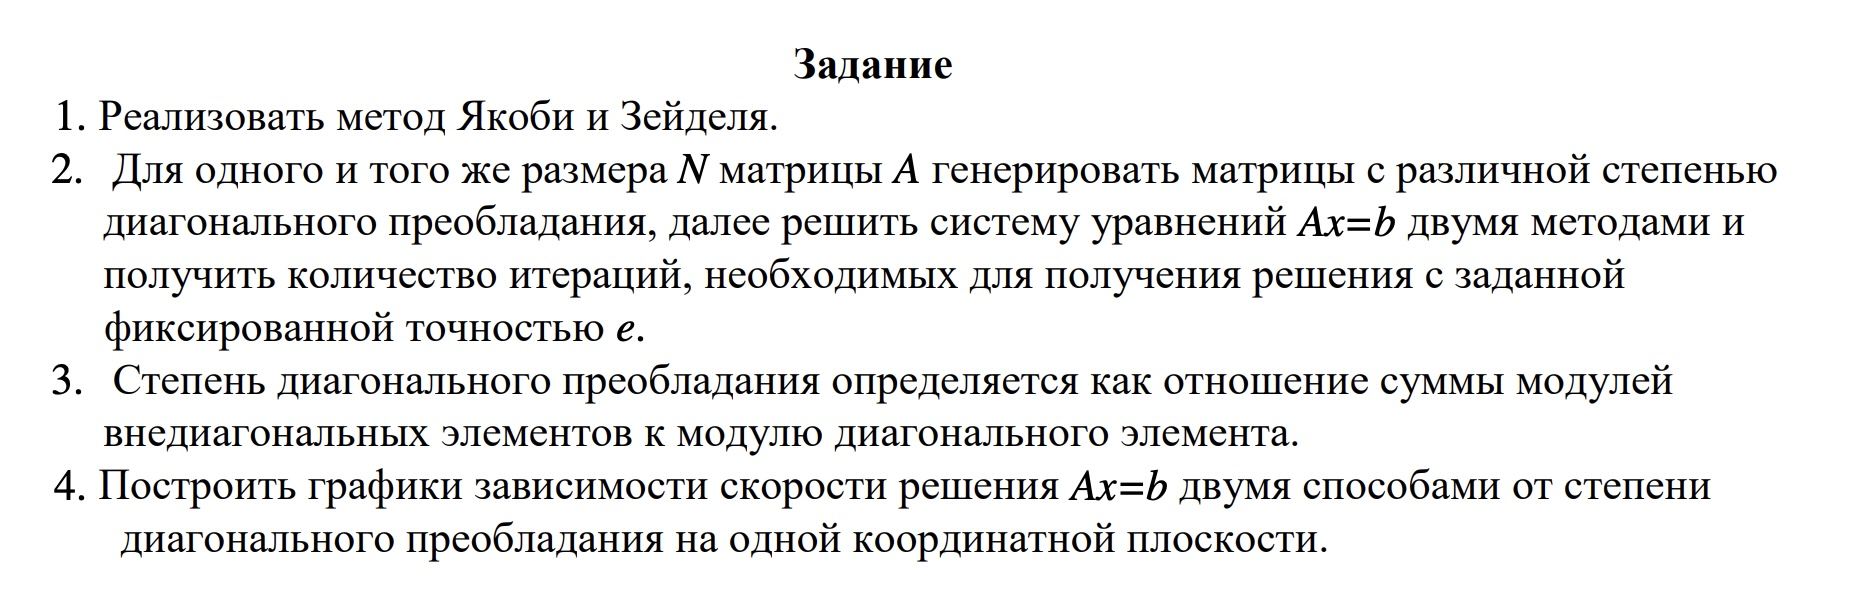

In [121]:
def jacobi(A, b, eps=1e-6):
    assert check_diag_dominance(A), 'A isnt triag dominance'
                                                                                                                                     
    x = np.zeros_like(b)
    
    D = np.diag(A)
    R = (A - np.diagflat(D)) / D
    g = b / D
    
    assert mat_norm(R) < 1, 'R matrix has norm > 1'
    c = 0
    while True:
        c += 1
        prev_x = x
        x = g - np.dot(R, x)
        
        if vec_norm(prev_x - x) < eps:
            return x, c
        

In [122]:
def seidel(A, b, eps=1e-6):
    assert check_diag_dominance(A), 'A isnt triag dominance'
    n = len(b)
    x = np.zeros_like(b)
    c = 0
    while True:
        c += 1
        y = x.copy()
        for i in range(n):
            s = sum([A[i][j] * y[j] for j in range(n) if i != j])
            y[i] = (b[i] - s) / A[i][i]
        if vec_norm(x-y) <= eps:
            return y, c
        x = y

In [123]:
N = 100
LOW = -10
HIGH = 10
EPS = 1e-14
DOMS = np.linspace(2, 22, 1000)

In [125]:
seidel_cs = []
jacobi_cs = []

for dom in tqdm(DOMS):
    A = gen_matrix(N, a=LOW, b=HIGH, triag_dom=dom)
    b = np.random.uniform(LOW, HIGH, N)
    x_gauss = gauss(A, b)
    x_jacobi, c_jacobi = jacobi(A, b, EPS)
    x_seidel, c_seidel = seidel(A, b, EPS)
    
    jacobi_cs.append(c_jacobi)
    seidel_cs.append(c_seidel)
    
#     print(f'triag dom: {dom}')
#     print(f'eps: {EPS}')
#     print(f'jacobi iters: {c_jacobi}')
#     print(f'seidel iters: {c_seidel}')
#     print('-'*50)

  0%|          | 0/1000 [00:00<?, ?it/s]

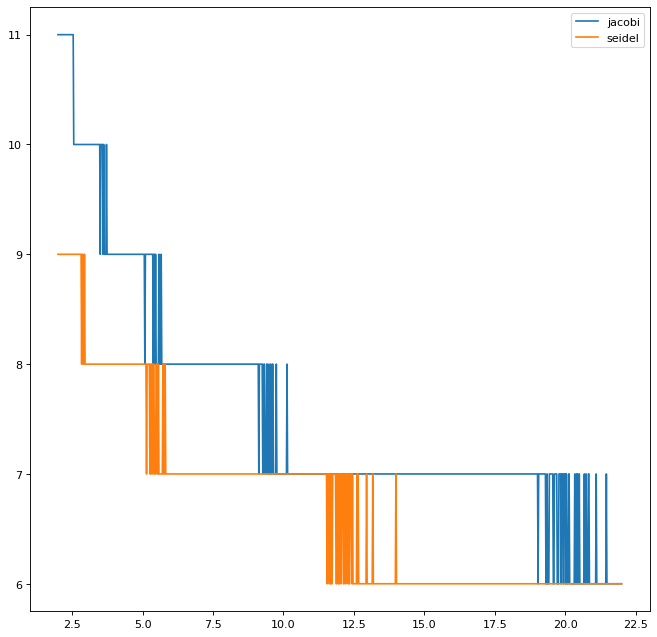

In [128]:
figure(figsize=(10, 10), dpi=80)
plt.plot(DOMS, jacobi_cs)
plt.plot(DOMS, seidel_cs)
plt.legend(['jacobi', 'seidel'])

In [109]:
from matplotlib.pyplot import figure

In [13]:
!jupyter-nbconvert --to PDFviaHTML lab7.ipynb

[NbConvertApp] Converting notebook lab6.ipynb to PDFviaHTML
[NbConvertApp] Writing 416620 bytes to lab6.pdf
